# A graphical look at income distribution of UK taxpayers 1999-2017

This is a Jupyter notebook available at github, if you want to run yourself then <br>
it is on github at <a>https://github.com/billblamey/hmrcincometaxpercentiles.git<a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

Load data from the gov.uk website

In [2]:
excel_file = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/782765/NS_Table_3_1a_1617.xlsx'

Read data into a pandas dataframe - first five lines are guff
- to do - find the title in case hmrc change the data format


In [3]:
Tax_Data = pd.read_excel(excel_file, skiprows=5)

Next bit of code is to store the data locally if you need to - pickle the data to the local directory and then comment the read_excel out

In [4]:
#localfilename='rawdatahmrc.pkl'
#Tax_Data.to_pickle(localfilename)
#Tax_Data = pd.read_pickle(localfilename)


In [5]:
del Tax_Data['Unnamed: 1']
del Tax_Data['Unnamed: 2']
del Tax_Data['2008-09 (a)'] #hmrc haven't worked out yet!



Data is in two blocks one header and 99 percentiles. income before tax first then income after tax.

In [6]:
rhmrc=100 
incomeb4t = Tax_Data.head(rhmrc).drop(index=0).set_index('Percentile point')
incomeaft = Tax_Data.tail(145).head(rhmrc).drop(100).set_index('Percentile point')

In [7]:
displayperc = [ .05, .1, .25, .50, .75, .90, .95 ] # min and max are the 1th and 99th percentiles

Some summary statistics for the income before tax.

In [8]:
incomeb4t.describe(percentiles = displayperc)

,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,18147.474747,18686.464646,19734.545455,20014.040404,20302.323232,21059.797980,22287.373737,23162.222222,24243.535354,25510.000000,25221.111111,26509.696970,27309.292929,28424.343434,29046.464646,30137.373737,30515.151515
std,13936.328708,14719.118160,15497.501989,15658.786991,16030.712731,16819.195604,18544.089029,19582.110722,20635.343482,20676.139951,19937.424449,20949.460197,21272.616548,22097.753010,22425.051194,23431.396110,23029.680776
min,4600.000000,4620.000000,4780.000000,4860.000000,4820.000000,4980.000000,5200.000000,5410.000000,5600.000000,6800.000000,6730.000000,7740.000000,8370.000000,9710.000000,10300.000000,10800.000000,11200.000000
5%,5837.000000,5718.000000,6066.000000,6185.000000,6075.000000,6313.000000,6602.000000,6861.000000,7149.000000,8240.000000,8091.000000,9119.000000,9849.000000,10980.000000,11380.000000,11880.000000,12380.000000
10%,6690.000000,6616.000000,7012.000000,7138.000000,7152.000000,7420.000000,7770.000000,8056.000000,8424.000000,9702.000000,9574.000000,10360.000000,11060.000000,11960.000000,12360.000000,12960.000000,13460.000000
25%,9355.000000,9380.000000,10005.000000,10100.000000,10200.000000,10400.000000,10900.000000,11300.000000,11900.000000,13050.000000,12850.000000,13650.000000,14350.000000,15100.000000,15600.000000,16200.000000,16800.000000
50%,14400.000000,14800.000000,15500.000000,15800.000000,16000.000000,16400.000000,17100.000000,17700.000000,18500.000000,19600.000000,19500.000000,20300.000000,21000.000000,21900.000000,22400.000000,23200.000000,23600.000000
75%,22100.000000,22800.000000,24050.000000,24450.000000,24850.000000,25850.000000,27100.000000,28100.000000,29200.000000,30600.000000,30550.000000,31750.000000,32550.000000,33550.000000,34150.000000,35250.000000,35600.000000
90%,32040.000000,33160.000000,35160.000000,35660.000000,35980.000000,37880.000000,40020.000000,41540.000000,43380.000000,45160.000000,44940.000000,46780.000000,47600.000000,48920.000000,49800.000000,51340.000000,51840.000000


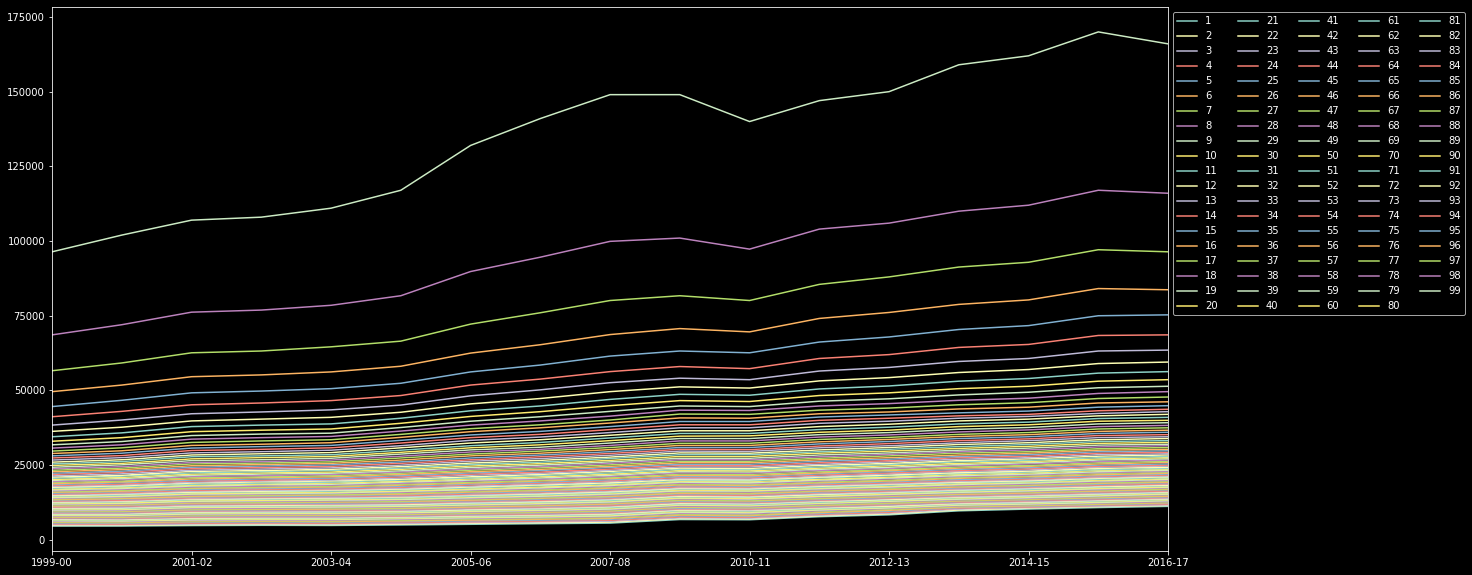

In [9]:
incomeb4t.T.plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',ncol=5)

so the rich are earning more money. After tax we can see the income tax has taken away some of that advantage.

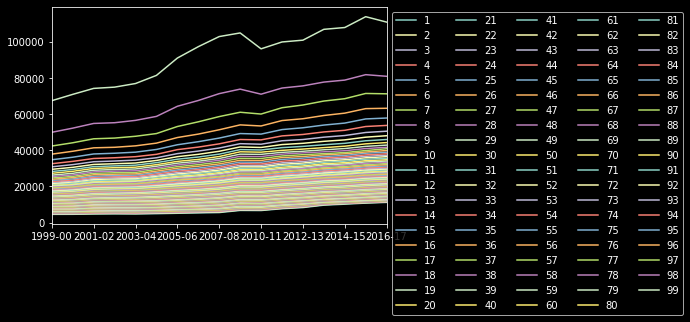

In [10]:
incomeaft.T.plot()
plt.legend(bbox_to_anchor=(1,1),loc='upper left', ncol=5)

In [11]:
incomeaft.describe(percentiles = displayperc)

,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,15252.121212,15685.757576,16596.666667,16827.474747,17009.797980,17638.787879,18589.090909,19276.969697,20152.020202,21532.020202,21307.575758,22435.959596,23140.606061,24169.292929,24744.444444,25679.797980,26148.484848
std,10065.476688,10604.271866,11118.272421,11219.001406,11474.343873,12067.911260,13195.062163,13889.297631,14617.141460,15006.050819,14393.525407,14898.850656,14980.037248,15384.974200,15533.592448,16186.350888,15943.998702
min,4570.000000,4600.000000,4760.000000,4840.000000,4800.000000,4950.000000,5170.000000,5370.000000,5570.000000,6740.000000,6690.000000,7690.000000,8320.000000,9660.000000,10200.000000,10800.000000,11200.000000
5%,5716.000000,5590.000000,5946.000000,6046.000000,5937.000000,6165.000000,6444.000000,6684.000000,6971.000000,7915.000000,7787.000000,8816.000000,9525.000000,10780.000000,11180.000000,11680.000000,12180.000000
10%,6444.000000,6374.000000,6778.000000,6888.000000,6918.000000,7168.000000,7484.000000,7746.000000,8092.000000,9132.000000,9008.000000,9966.000000,10660.000000,11560.000000,11960.000000,12560.000000,13060.000000
25%,8570.000000,8590.000000,9205.000000,9315.000000,9375.000000,9560.000000,10015.000000,10400.000000,10900.000000,11900.000000,11800.000000,12600.000000,13300.000000,14100.000000,14600.000000,15200.000000,15700.000000
50%,12500.000000,12900.000000,13600.000000,13800.000000,14000.000000,14400.000000,14900.000000,15400.000000,16100.000000,17200.000000,17100.000000,18000.000000,18700.000000,19500.000000,20000.000000,20800.000000,21300.000000
75%,18650.000000,19250.000000,20400.000000,20700.000000,20900.000000,21750.000000,22850.000000,23550.000000,24550.000000,26050.000000,26000.000000,27200.000000,27950.000000,29000.000000,29650.000000,30600.000000,31100.000000
90%,26500.000000,27520.000000,29200.000000,29600.000000,29900.000000,31380.000000,33100.000000,34200.000000,35720.000000,38160.000000,38040.000000,39120.000000,39740.000000,40540.000000,41260.000000,42480.000000,43180.000000


In [12]:
taxpaid = incomeb4t - incomeaft

Now we can look at the difference in tax paid, having subtracted the two dataframes

In [13]:
taxpaid.describe(percentiles = displayperc)

,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2895.353535,3000.707071,3137.878788,3186.565657,3292.525253,3421.010101,3698.282828,3885.252525,4091.515152,3977.979798,3913.535354,4073.737374,4168.686869,4255.050505,4302.020202,4457.575758,4366.666667
std,3960.377820,4218.384509,4497.455351,4558.300606,4668.568881,4865.822391,5475.683545,5817.816819,6145.484050,5820.622026,5738.435276,6260.463826,6515.992672,6928.985610,7130.503314,7475.102769,7348.705286
min,30.000000,20.000000,20.000000,20.000000,20.000000,30.000000,30.000000,40.000000,30.000000,60.000000,40.000000,50.000000,50.000000,50.000000,100.000000,0.000000,0.000000
5%,129.000000,128.000000,120.000000,139.000000,138.000000,148.000000,158.000000,177.000000,178.000000,325.000000,304.000000,303.000000,324.000000,200.000000,200.000000,200.000000,200.000000
10%,246.000000,242.000000,234.000000,250.000000,234.000000,252.000000,286.000000,310.000000,332.000000,548.000000,522.000000,418.000000,400.000000,400.000000,400.000000,400.000000,400.000000
25%,785.000000,790.000000,800.000000,785.000000,825.000000,840.000000,885.000000,900.000000,1000.000000,1150.000000,1050.000000,1050.000000,1050.000000,1000.000000,1000.000000,1000.000000,1100.000000
50%,1900.000000,1900.000000,1900.000000,2000.000000,2000.000000,2100.000000,2200.000000,2300.000000,2400.000000,2400.000000,2400.000000,2300.000000,2300.000000,2400.000000,2400.000000,2400.000000,2300.000000
75%,3450.000000,3550.000000,3650.000000,3750.000000,3950.000000,4100.000000,4250.000000,4550.000000,4650.000000,4550.000000,4550.000000,4550.000000,4600.000000,4550.000000,4500.000000,4650.000000,4500.000000
90%,5540.000000,5640.000000,5960.000000,6060.000000,6080.000000,6500.000000,6920.000000,7340.000000,7660.000000,7000.000000,6900.000000,7660.000000,7860.000000,8380.000000,8540.000000,8860.000000,8660.000000


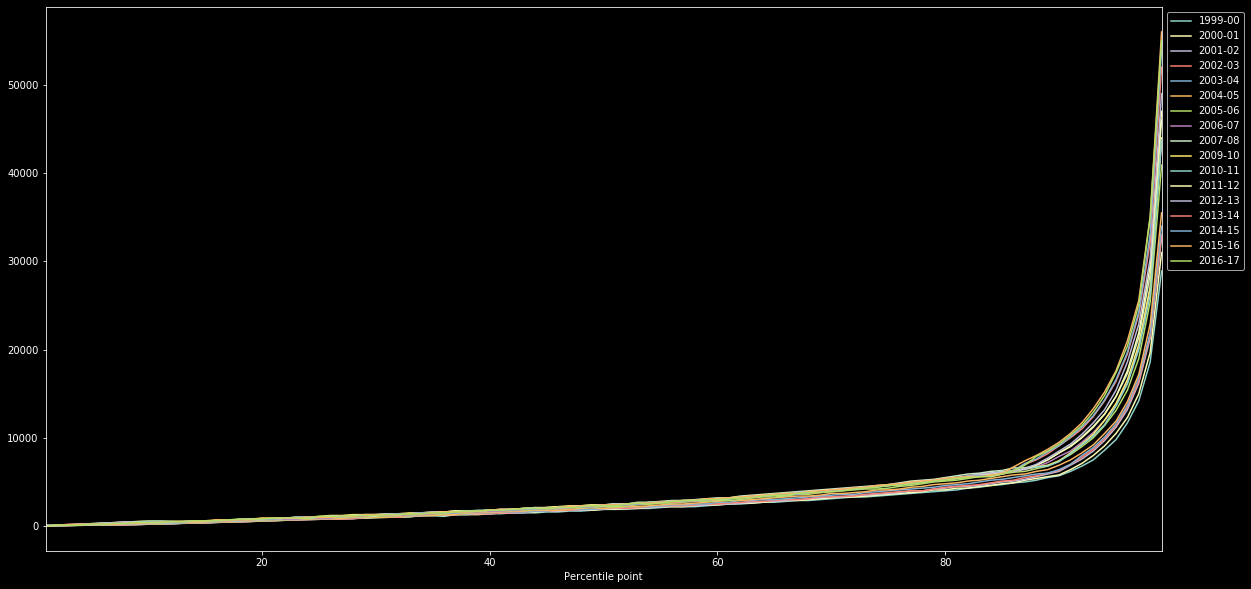

In [14]:
taxpaid.plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

So rich people pay a lot more tax.

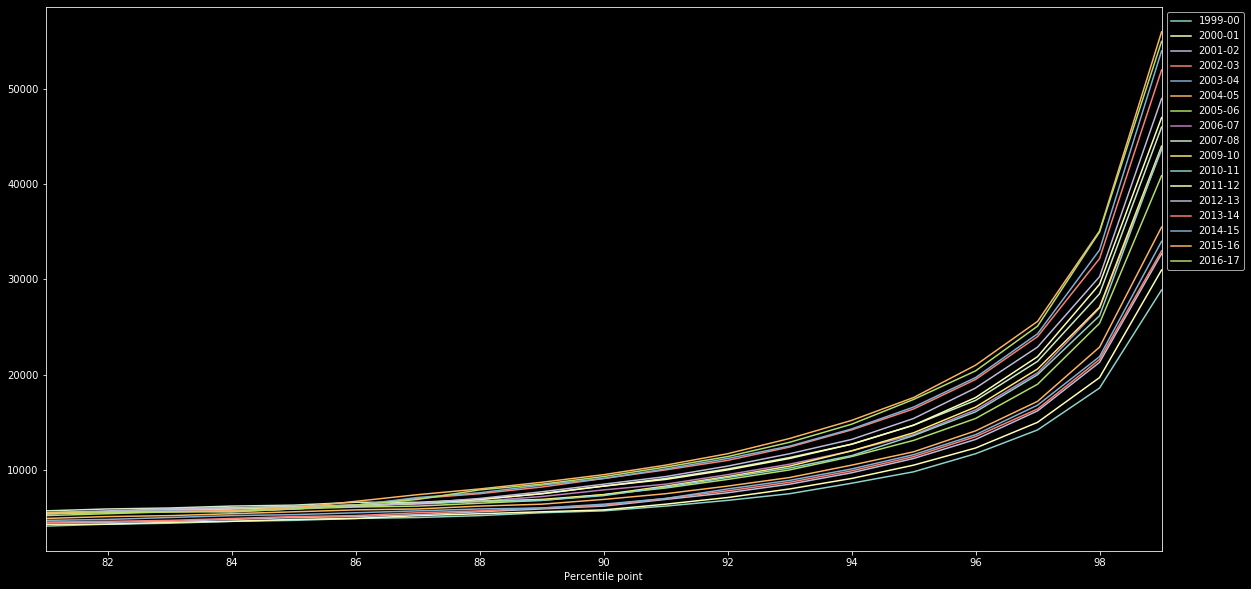

In [15]:
taxpaid[80:99].plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

and the top 1% pay event more

Now lets look at percentages

In [16]:
taxpaidpercent = taxpaid / incomeb4t

- to do - get the percentage formatter working

Now we can transpose the series and look at how the 

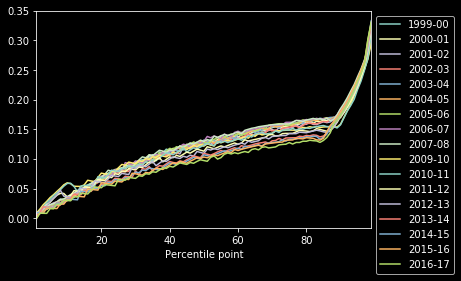

In [17]:
taxpaidpercent.plot()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

wow it's really taking off above 80 - there is some strange wobbly line thing going ahead too

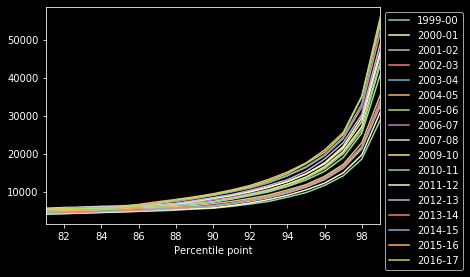

In [18]:
taxpaid[80:99].plot()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

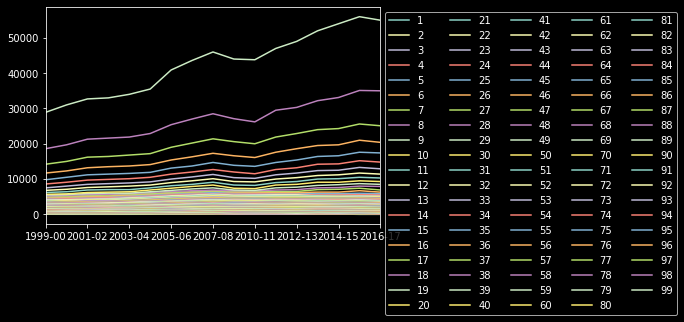

In [19]:
taxpaid.T.plot()
plt.legend(bbox_to_anchor=(1,1),loc='upper left',ncol=5)

crazy plot - some people have been paying less tax and some more - lets zoom in

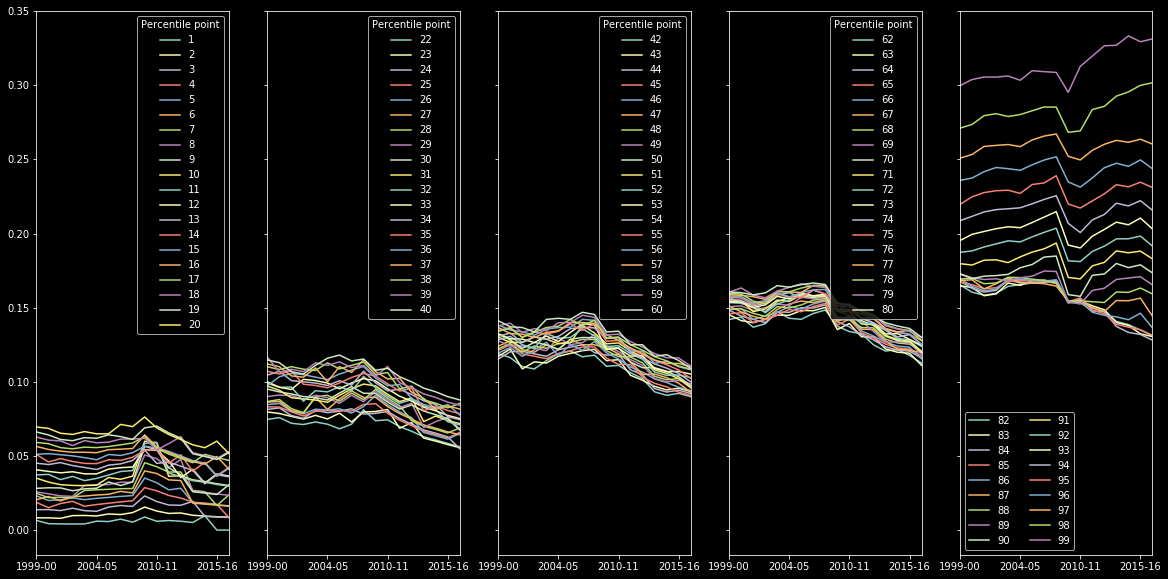

In [20]:
fig, ax = plt.subplots(ncols= 5, figsize=(20,10), sharey='all')
taxpaidpercent[0:20].T.plot(ax=ax[0])
taxpaidpercent[21:40].T.plot(ax=ax[1])
taxpaidpercent[41:60].T.plot(ax=ax[2])
taxpaidpercent[61:80].T.plot(ax=ax[3])
taxpaidpercent[81:100].T.plot(ax=ax[4])
plt.legend(loc='best', ncol=2)

# to do - use group by quintile for these plots

In [21]:
taxpaid['quintile'] = np.ceil(taxpaid.index / 20).astype(int)
bg = taxpaid.groupby('quintile')


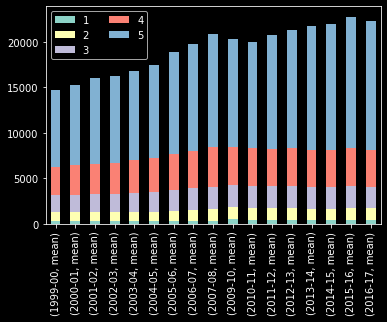

In [22]:
bg.agg(['mean']).T.plot(kind='bar',stacked=True)
plt.legend(loc='best', ncol=2)

Well no surprise there - the top quintile pay more - now we can do this as a percentage.

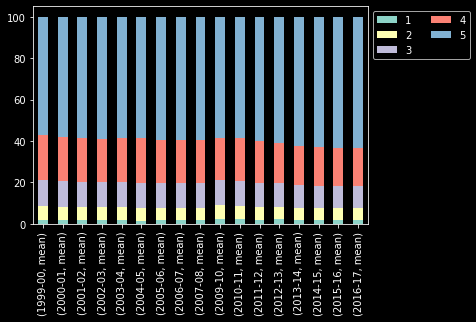

In [23]:
bg.agg(['mean']).apply(
    lambda x: 100 * x / x.sum()
).T.plot(kind='bar', stacked='true')
plt.legend(bbox_to_anchor=(1,1),loc='upper left', ncol=2)

Let's look at it unstacked

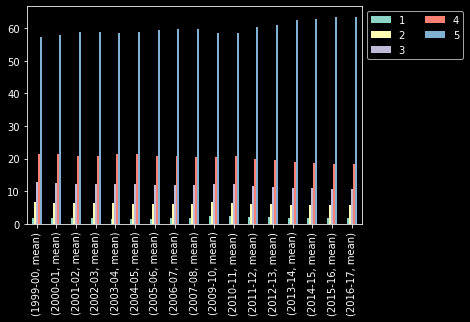

In [24]:
bg.agg(['mean']).apply(
    lambda x: 100 * x / x.sum()
).T.plot(kind='bar')
plt.legend(bbox_to_anchor=(1,1),loc='upper left', ncol=2)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ee2a10>,
      dtype=object)

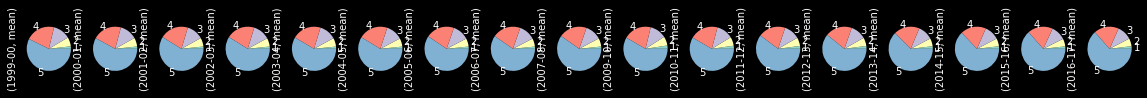

In [25]:
bg.agg(['mean']).apply(
    lambda x: 100 * x / x.sum()
).plot(kind='pie', subplots=True, legend=False, figsize=(20,10))
#plt.legend(bbox_to_anchor=(1,1),loc='upper left', ncol=2)
#%matplotlib inline

This is the default pie chart - quite hard to see what's going on. Below I've rearranged a bit - It's quite hard work to do so.

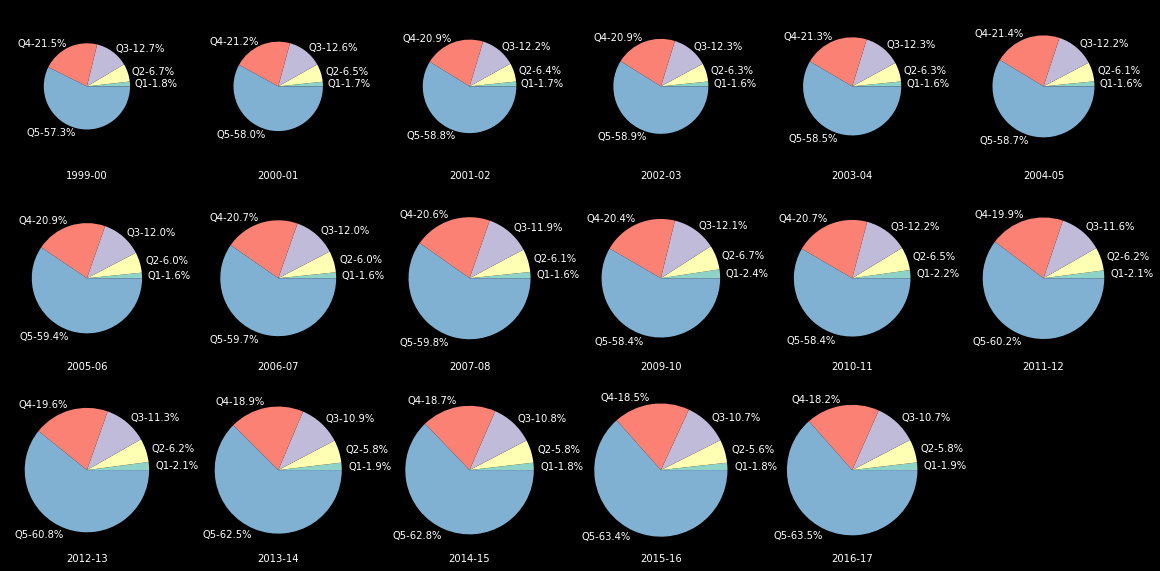

In [28]:
import matplotlib.gridspec as gridspec
ncols=6
nrows=3
fig1, f1_axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20,10))
plt.axis('off')
gbyq = taxpaid.groupby('quintile')

piearray = gbyq.agg(['mean']).T

piearraytt = piearray.sum().mean()/3

for i,pie in enumerate(piearray.T):
    slici = piearray.iloc[ i, : ]
    perc_lbl =  ["Q{0:}-{1:.1f}%".format(quin, val/slici.sum() * 100) for quin,val in zip(slici.index.to_list(),slici)]
    ax = f1_axes[int(np.floor(i / ncols)), i % ncols]
    ax.pie(slici, radius = slici.sum()/piearraytt, labels = perc_lbl)
    ax.set_xlabel(pie[0])
 

In [41]:
#taxpaid.plot(kind='kde', subplots=True, legend=False, figsize=(20,10))
# Not very interesting plots

In [43]:
#incomeb4t.plot(kind='kde', subplots=True, legend=False, figsize=(20,20))
# Not very interesting on this dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e96f110>,
      dtype=object)

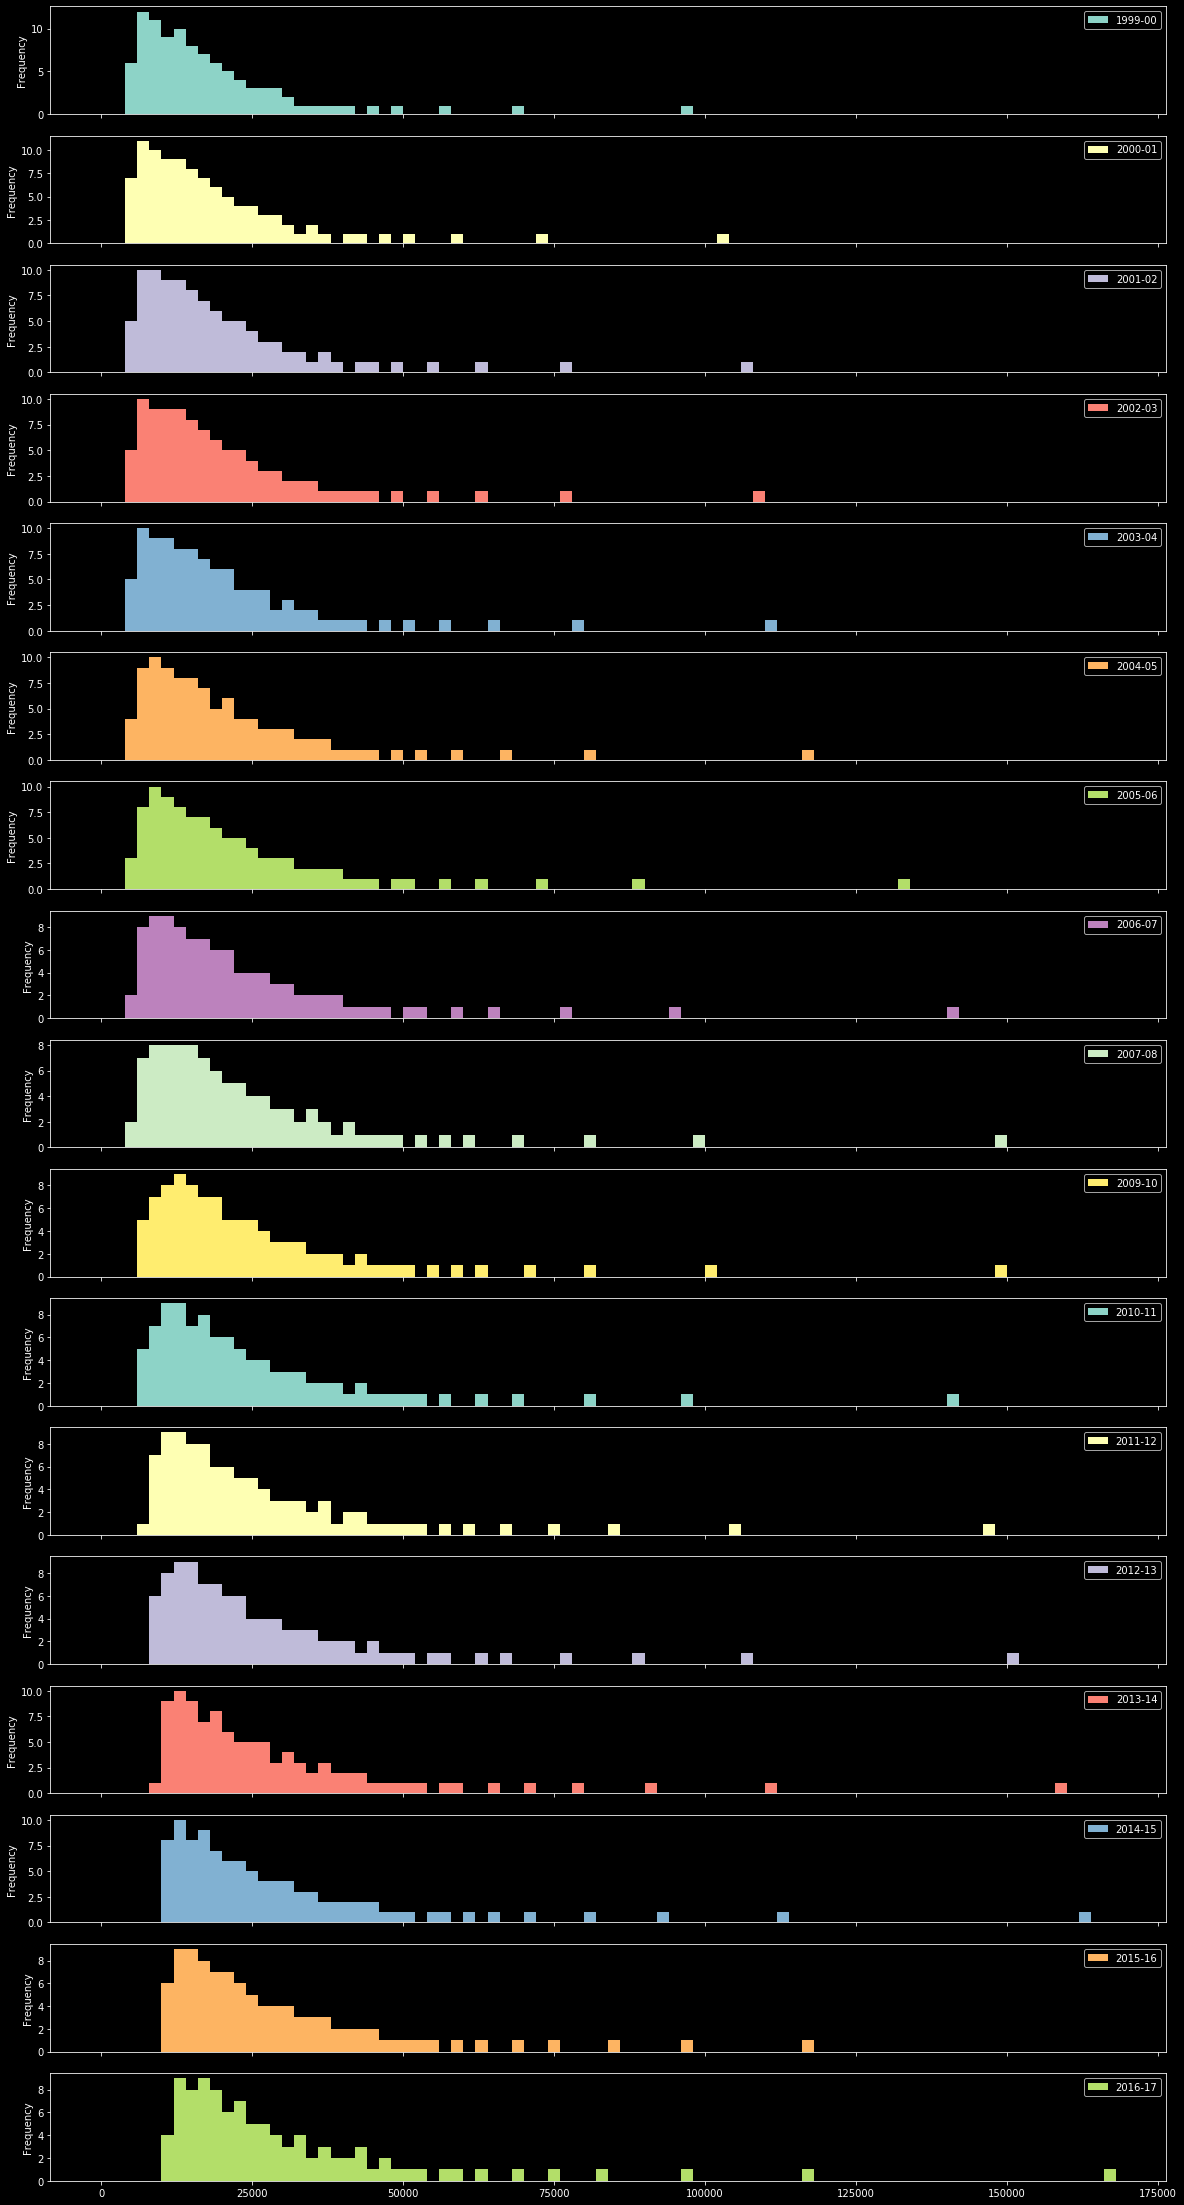

In [67]:
incomeb4t.plot(kind='hist', subplots=True, figsize=(20,40), bins=np.arange(start=0,stop=170000,step=2000), sharex=True)

Love this space invaders tyoe graph - clearly shows that entry point into paying tax has increased and that the top 1% is moving away in tax terms.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e96f750>,
      dtype=object)

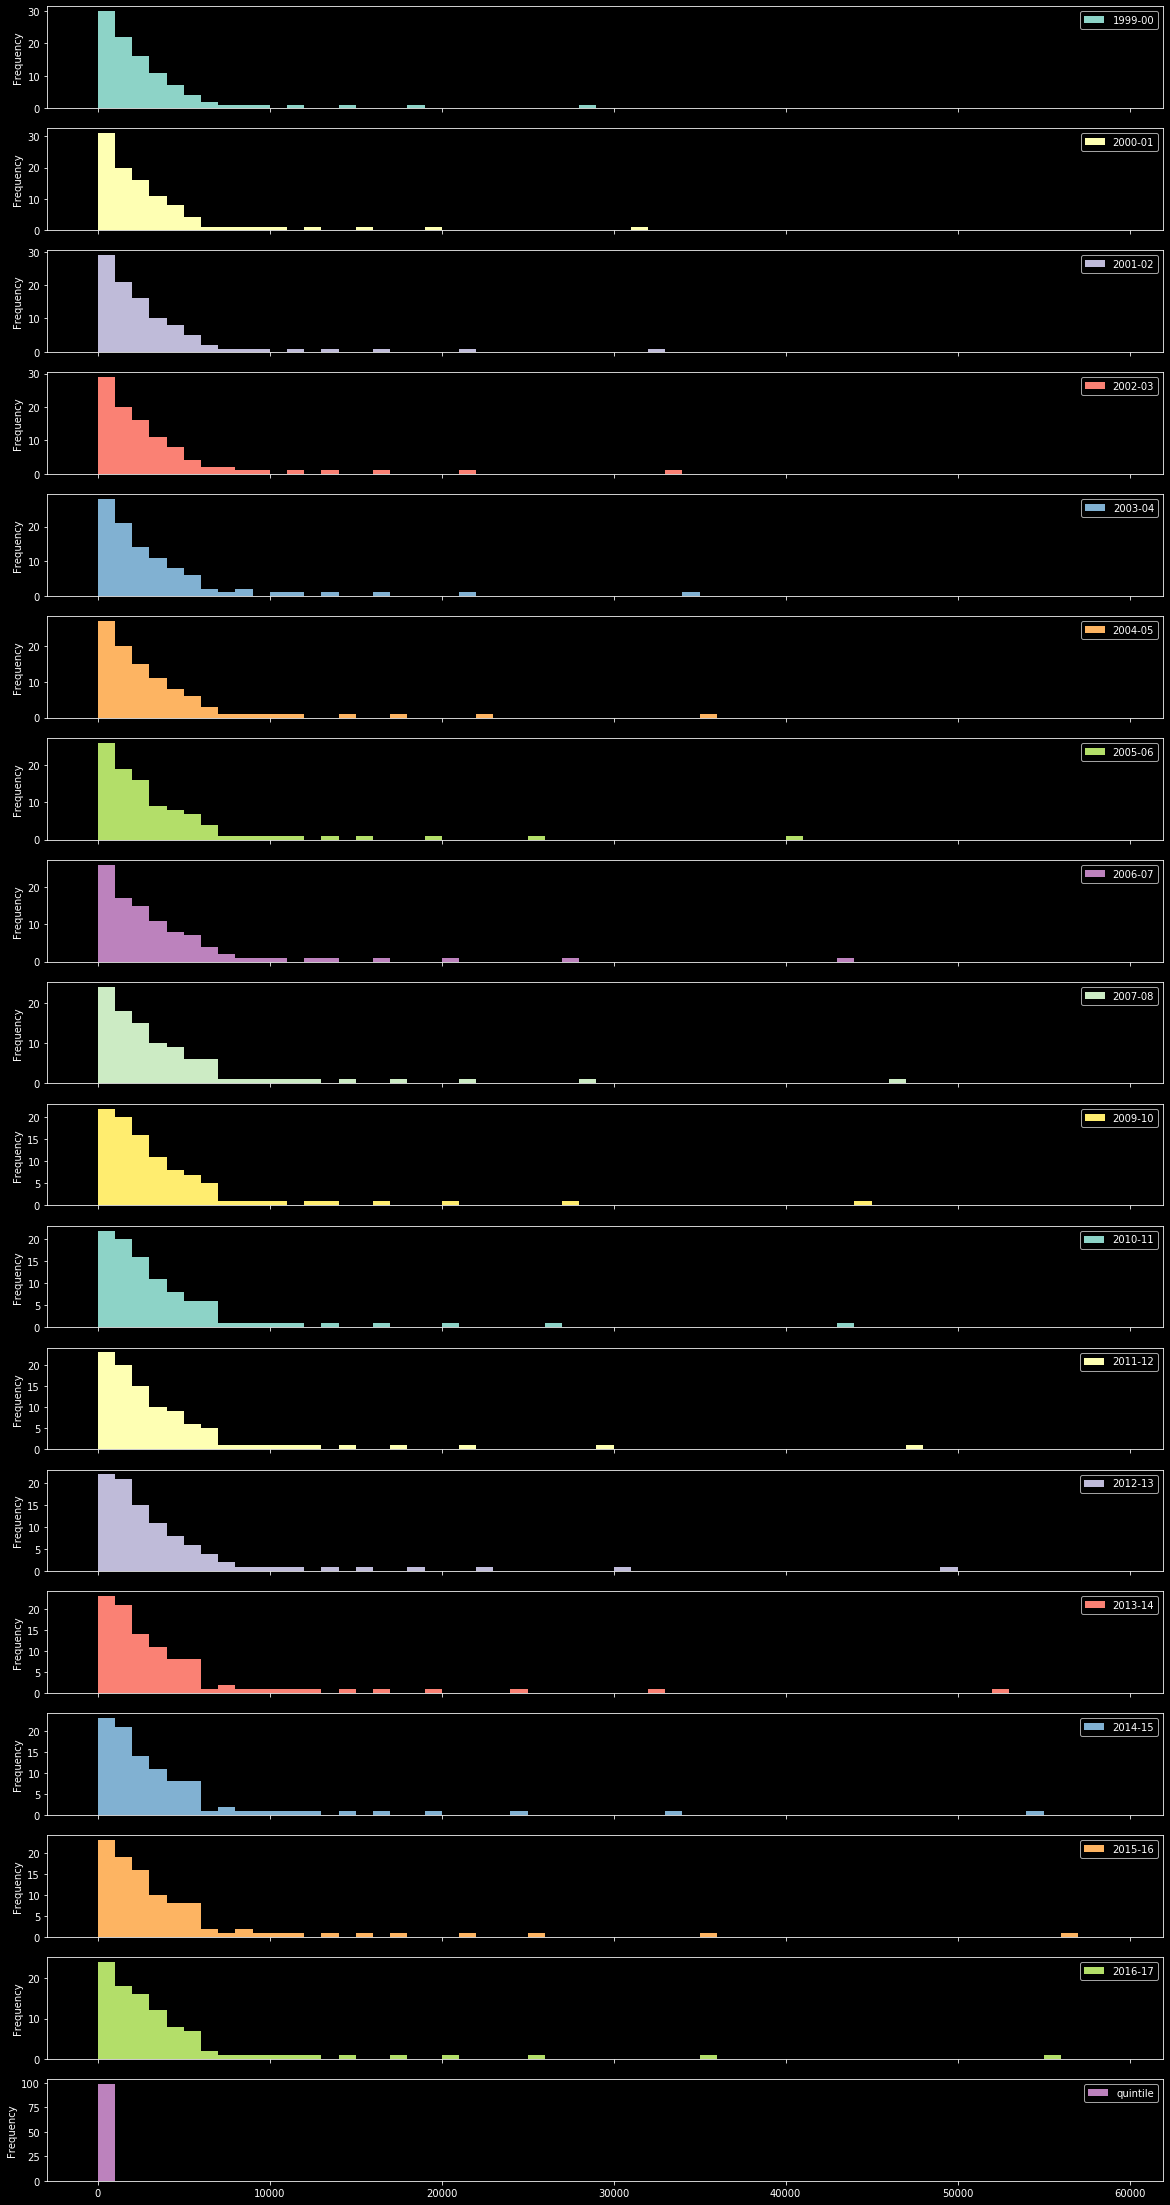

In [68]:
taxpaid.plot(kind='hist', subplots=True, figsize=(20,40), bins=np.arange(start=0,stop=60000,step=1000), sharex=True)

286640.0


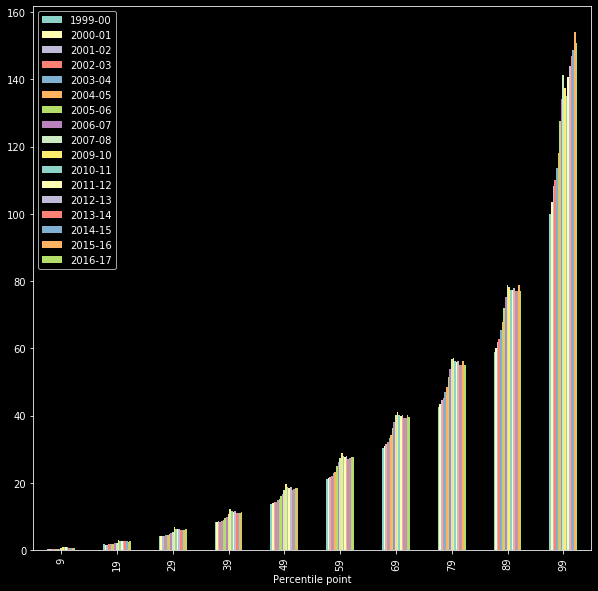

In [66]:
norm = taxpaid[ '1999-00' ].sum()
print(norm)
cs = taxpaid.drop(['quintile'], axis=1).apply(
    lambda x : 100 * x/x.sum() # x.sum() if you want based on 100, norm on 1999-00
).cumsum()

cs.loc[cs.index%10 == 9].plot(kind='bar', figsize=(10,10))


This is quite interesting - it show that until the financial crisis all groups were paying more tax - then afterwards only the top 10% stared paying more tax.

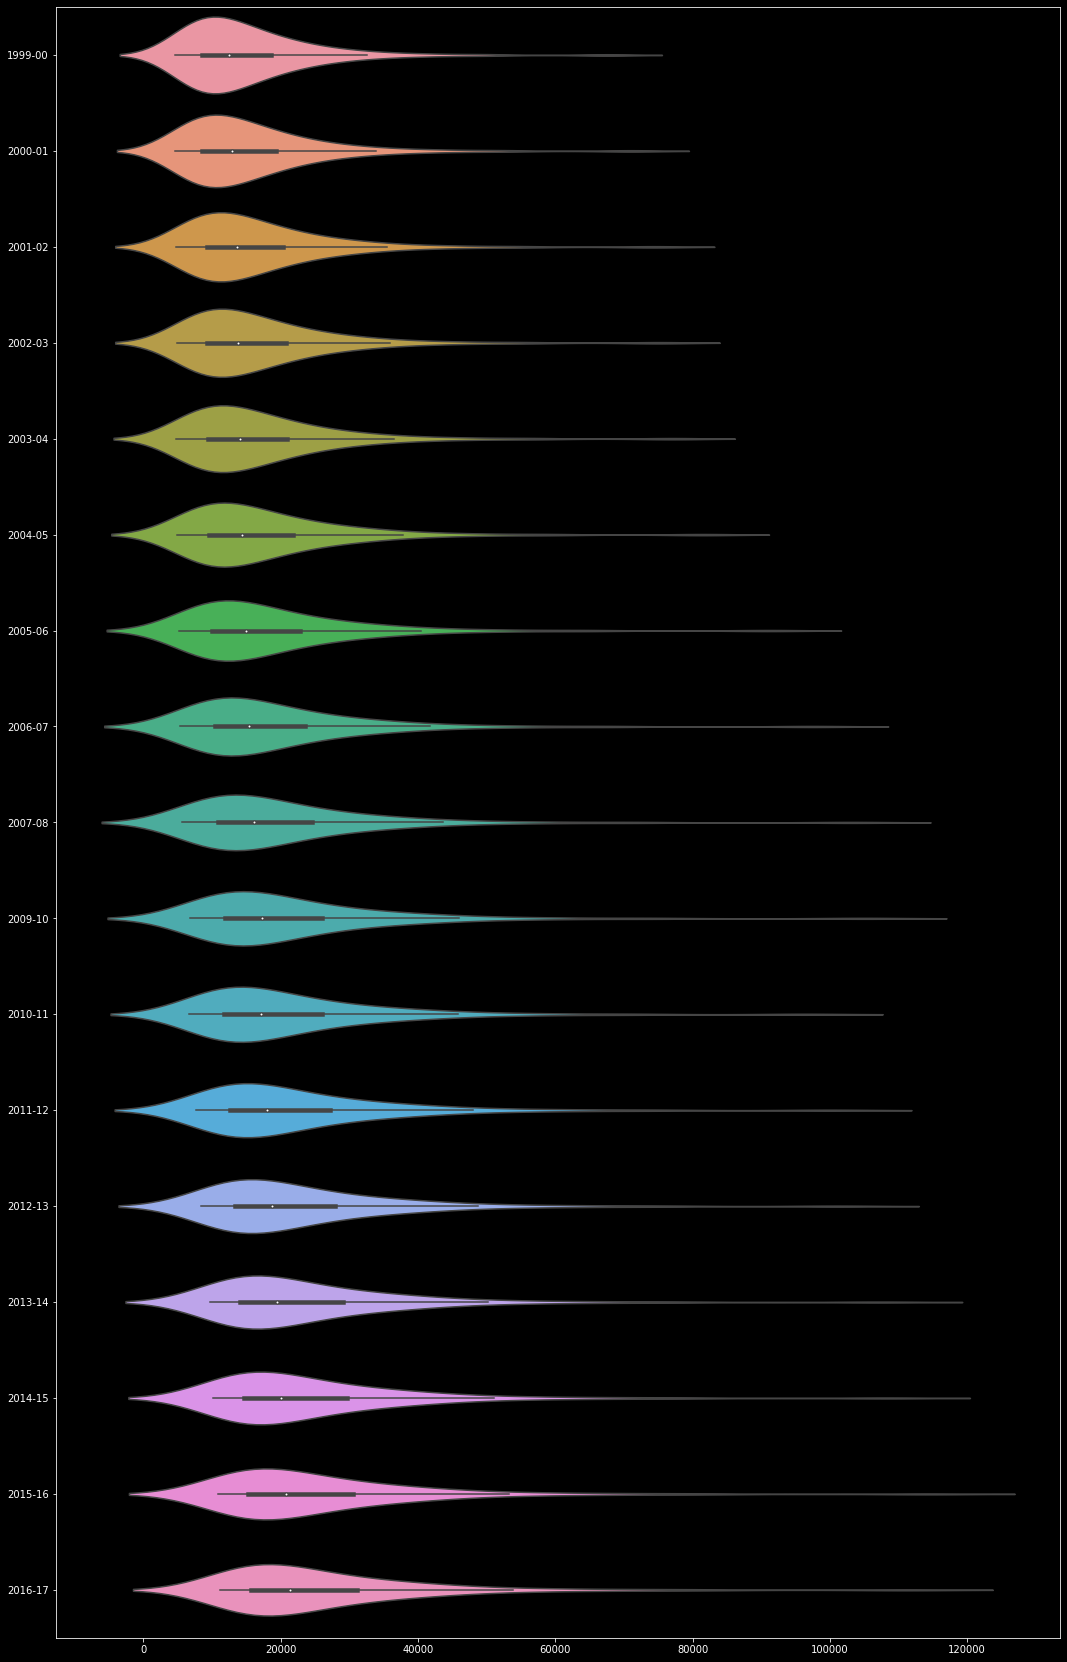

In [82]:
import seaborn as sns
fig = plt.figure(figsize=(18,30))
#incomeb4t['hue']='b4t'
#incomeaft['hue']='aft'
#sns.violinplot( data=(incomeb4t+incomeaft)['1999-00'],split=True, hue="hue", orient='h')
sns.violinplot(data=incomeaft,inner="box",split=True, orient='h')
